In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Please note we have deleted ID columns and also the rows with NaN values in CSV file

df = pd.read_csv("C:/Users/drash/OneDrive/Desktop/PythonSQL/agriculture.csv")

df1 = pd.read_csv("C:/Users/drash/OneDrive/Desktop/PythonSQL/agriculture.csv")

df

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0,0,1,0
1,209,1,0,1,0,0,0,2,1
2,257,1,0,1,0,0,0,2,1
3,257,1,1,1,0,0,0,2,1
4,342,1,0,1,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...
4152,2138,0,1,2,60,47,6,3,0
4153,2139,0,1,2,30,47,2,1,1
4154,2267,0,1,2,10,7,27,2,0
4155,2267,0,1,2,10,20,24,2,0


In [3]:
# All are numeric data types hence no conversion is required

df.dtypes

Estimated_Insects_Count    int64
Crop_Type                  int64
Soil_Type                  int64
Pesticide_Use_Category     int64
Number_Doses_Week          int64
Number_Weeks_Used          int64
Number_Weeks_Quit          int64
Season                     int64
Crop_Damage                int64
dtype: object

In [4]:
df.shape

(4157, 9)

In [5]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000
mean,1368.286264,0.225403,0.475343,2.282175,26.528747,28.891027,9.293481,1.891989,0.191484
std,815.550890,0.417898,0.499452,0.471010,15.651629,12.586005,9.753605,0.696910,0.452663
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,732.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


Observations:
1. Mean > Median (50%) ===> For most columns ==> Left Skewed
2. Data Large difference between 75 % and max ===> Estimated_Insects_Counts, Weeks ===> Outliers Present

# Checking NaN values

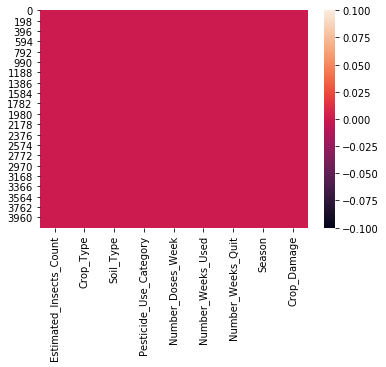

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

# Checking for ?

In [8]:
(df == '?').sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

# Label Encoder

Need note be used as all columns have numeric data types

In [9]:
df.dtypes

Estimated_Insects_Count    int64
Crop_Type                  int64
Soil_Type                  int64
Pesticide_Use_Category     int64
Number_Doses_Week          int64
Number_Weeks_Used          int64
Number_Weeks_Quit          int64
Season                     int64
Crop_Damage                int64
dtype: object

# Univarient Analysis

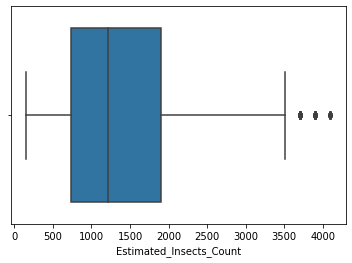

In [10]:
sns.boxplot(df["Estimated_Insects_Count"])

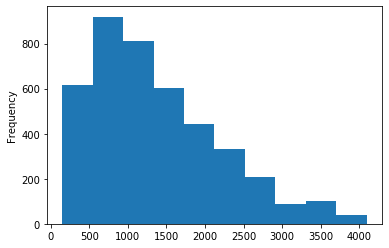

In [11]:
df["Estimated_Insects_Count"].plot.hist()

We have maximum data for insects between 750-1000

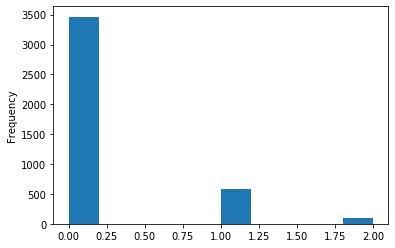

In [12]:
df["Crop_Damage"].plot.hist()

In [13]:
df1.Crop_Damage.value_counts()

0    3465
1     588
2     104
Name: Crop_Damage, dtype: int64

Reason for damage of crops is highest related to single reason

# Bivarient Analysis

In [14]:
df.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0,0,1,0
1,209,1,0,1,0,0,0,2,1
2,257,1,0,1,0,0,0,2,1
3,257,1,1,1,0,0,0,2,1
4,342,1,0,1,0,0,0,2,1


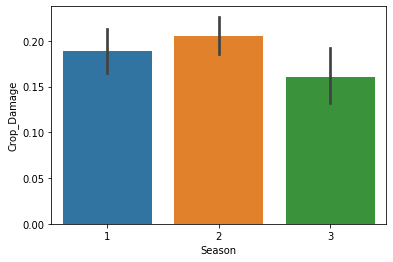

In [15]:
# Damage is most in 2nd season

sns.barplot(x=df['Season'], y=df['Crop_Damage'],data=df)
plt.show()

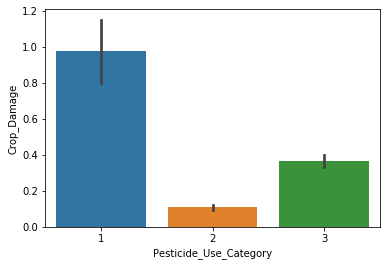

In [16]:
# Damage is most due to 1 category of Pesticide used

sns.barplot(x=df['Pesticide_Use_Category'], y=df['Crop_Damage'],data=df)
plt.show()

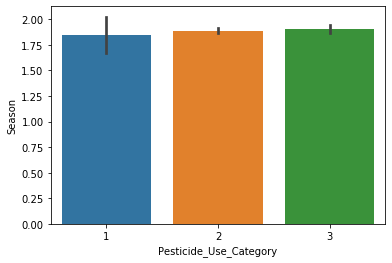

In [17]:
# Damage is most due to 1 category of Pesticide used

sns.barplot(x=df['Pesticide_Use_Category'], y=df['Season'],data=df)
plt.show()

# Multivarient Analysis

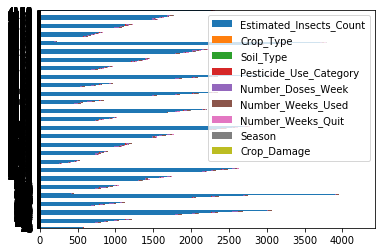

In [18]:
df.plot.barh(stacked = True)

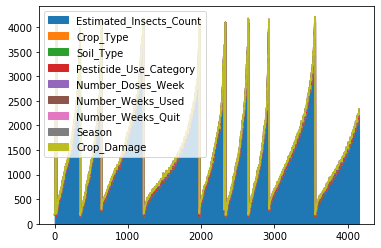

In [19]:
df.plot.area()

# Correlation

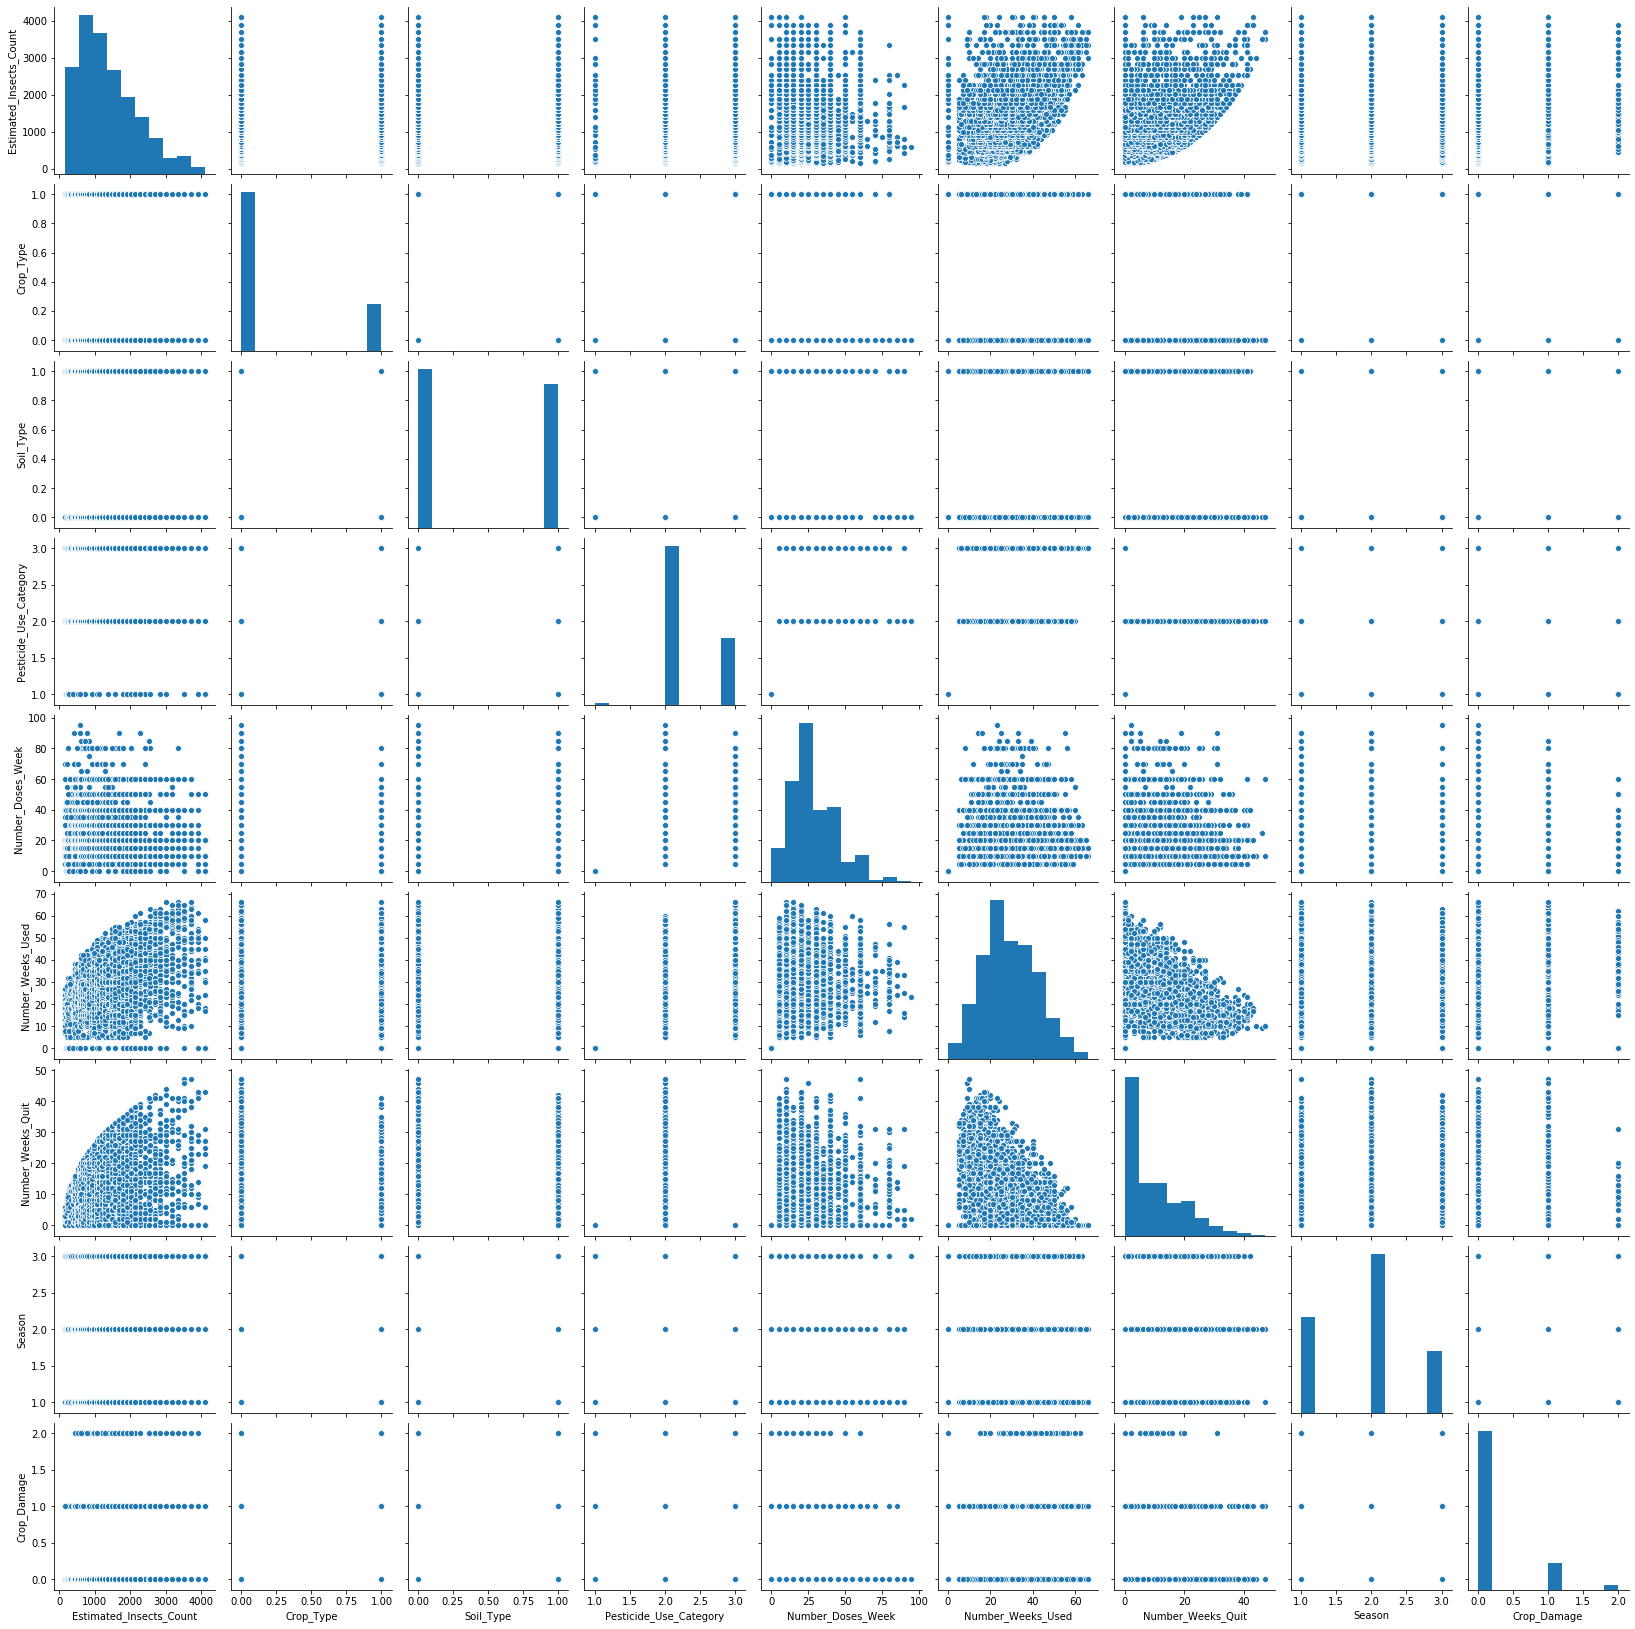

In [20]:
sns.pairplot(df)

In [21]:
df.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.039040,-0.156353,-0.035732,-0.124894,0.449470,0.249871,-0.015429,0.196067
Crop_Type,-0.039040,1.000000,-0.174532,0.355242,-0.165631,-0.002237,-0.272315,0.001822,0.027448
Soil_Type,-0.156353,-0.174532,1.000000,0.020889,0.051378,-0.098399,-0.037584,0.003753,-0.057868
Pesticide_Use_Category,-0.035732,0.355242,0.020889,1.000000,-0.007122,0.387982,-0.570960,0.010773,0.202449
Number_Doses_Week,-0.124894,-0.165631,0.051378,-0.007122,1.000000,0.104022,-0.032430,-0.006366,-0.017724
Number_Weeks_Used,0.449470,-0.002237,-0.098399,0.387982,0.104022,1.000000,-0.467386,-0.011108,0.244988
Number_Weeks_Quit,0.249871,-0.272315,-0.037584,-0.570960,-0.032430,-0.467386,1.000000,0.002753,-0.155354
Season,-0.015429,0.001822,0.003753,0.010773,-0.006366,-0.011108,0.002753,1.000000,-0.016798
Crop_Damage,0.196067,0.027448,-0.057868,0.202449,-0.017724,0.244988,-0.155354,-0.016798,1.000000


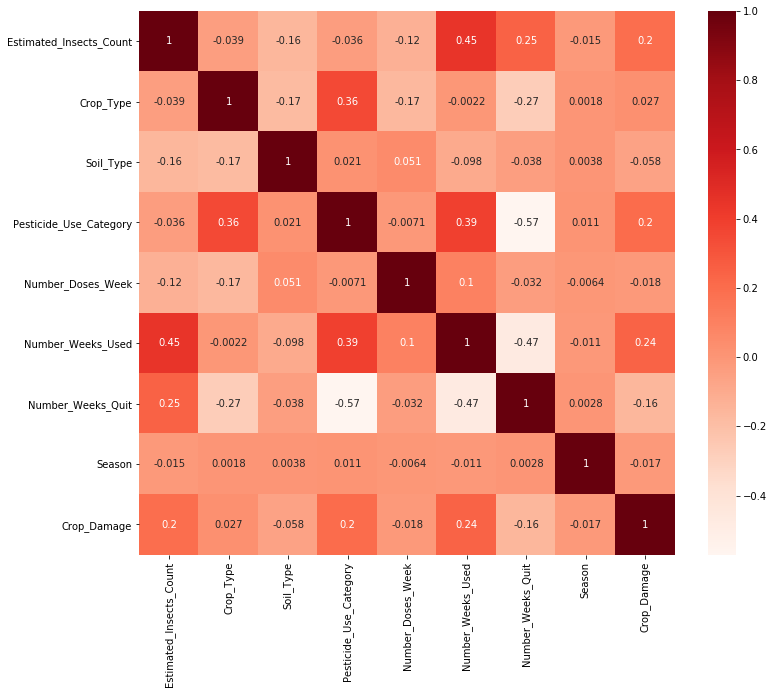

In [22]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr() ,  cmap = "Reds" , annot = True)

Observations:
    1. Positively correlated
    Crop Damage - Eatimated_Insect_Count, Pesticide_Used_Category,Number_Weeks_Used
    2. Negatively correlated
    Crop Damage - Number_Doese_week, Number_Week_quit and Season

# Checking out Outliers and removing

In [23]:
col_list = df.columns.values

ncols = 5
nrows = 12

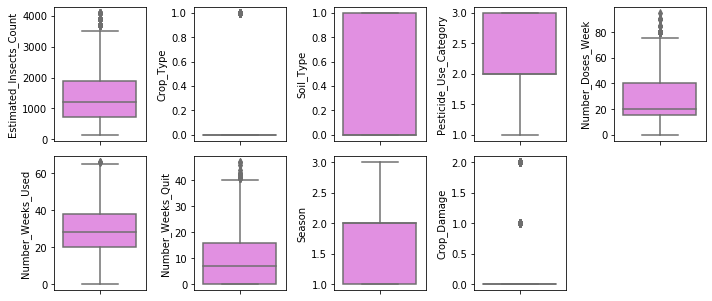

In [24]:

plt.figure(figsize = (2*ncols, 5*ncols))
for i in range( 0 , len(col_list)):
    plt.subplot(nrows , ncols , i+1)
    sns.boxplot(df[col_list[i]] , color = 'violet' , orient = 'v')
    plt.tight_layout()

Outliers Present only in Number_Weeks_Used

In [25]:
from scipy.stats import zscore


z = np.abs(zscore(df))

df_new = df[(z<3).all(axis = 1) ]

df_new

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0,0,1,0
1,209,1,0,1,0,0,0,2,1
2,257,1,0,1,0,0,0,2,1
3,257,1,1,1,0,0,0,2,1
4,342,1,0,1,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...
4152,2138,0,1,2,60,47,6,3,0
4153,2139,0,1,2,30,47,2,1,1
4154,2267,0,1,2,10,7,27,2,0
4155,2267,0,1,2,10,20,24,2,0


In [26]:
df.shape

(4157, 9)

In [27]:
df_new.shape

(3949, 9)

Rows have been dropped in df_new to remove outliers

# Splitting in to Attributes and Target variables

In [56]:
x = df_new.drop(["Crop_Damage"] , axis = 1)

x

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,0,1,0,0,0,1
1,209,1,0,1,0,0,0,2
2,257,1,0,1,0,0,0,2
3,257,1,1,1,0,0,0,2
4,342,1,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...
4152,2138,0,1,2,60,47,6,3
4153,2139,0,1,2,30,47,2,1
4154,2267,0,1,2,10,7,27,2
4155,2267,0,1,2,10,20,24,2


In [29]:
y = df_new["Crop_Damage"]

y

0       0
1       1
2       1
3       1
4       1
       ..
4152    0
4153    1
4154    0
4155    0
4156    0
Name: Crop_Damage, Length: 3949, dtype: int64

In [30]:
y = y.values.reshape(-1,1)

y.shape , x.shape

((3949, 1), (3949, 8))

# Checking Skewness

In [31]:
df.skew()

Estimated_Insects_Count    0.915308
Crop_Type                  1.314816
Soil_Type                  0.098785
Pesticide_Use_Category     0.689065
Number_Doses_Week          0.963165
Number_Weeks_Used          0.264944
Number_Weeks_Quit          0.916936
Season                     0.149567
Crop_Damage                2.340099
dtype: float64

In [32]:
# Reducing Skewness using squareroot method of numpy
dfs = df

for col in dfs.columns:
    if dfs.skew().loc[col]>0.55:
        dfs[col] = np.sqrt(dfs[col])[0]

In [33]:
dfs.skew()

Estimated_Insects_Count    0.000000
Crop_Type                  0.000000
Soil_Type                  0.098785
Pesticide_Use_Category     0.000000
Number_Doses_Week          0.000000
Number_Weeks_Used          0.264944
Number_Weeks_Quit          0.000000
Season                     0.149567
Crop_Damage                0.000000
dtype: float64

# Scaling x

In [34]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x2 = sc.fit_transform(x)
x2 = pd.DataFrame(x2,columns = x.columns)
x2

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,-1.484419,1.847239,-0.957596,-2.748709,-1.774682,-2.311394,-0.977190,-1.279215
1,-1.457076,1.847239,-0.957596,-2.748709,-1.774682,-2.311394,-0.977190,0.152650
2,-1.394579,1.847239,-0.957596,-2.748709,-1.774682,-2.311394,-0.977190,0.152650
3,-1.394579,1.847239,1.044282,-2.748709,-1.774682,-2.311394,-0.977190,0.152650
4,-1.283907,1.847239,-0.957596,-2.748709,-1.774682,-2.311394,-0.977190,0.152650
...,...,...,...,...,...,...,...,...
3944,1.054527,-0.541349,1.044282,-0.594153,2.327890,1.481188,-0.342568,1.584515
3945,1.055829,-0.541349,1.044282,-0.594153,0.276604,1.481188,-0.765649,-1.279215
3946,1.222488,-0.541349,1.044282,-0.594153,-1.090920,-1.746541,1.878608,0.152650
3947,1.222488,-0.541349,1.044282,-0.594153,-1.090920,-0.697529,1.561297,0.152650


In [35]:
x2.skew()

Estimated_Insects_Count    0.794630
Crop_Type                  1.306386
Soil_Type                  0.086718
Pesticide_Use_Category     0.766209
Number_Doses_Week          0.727243
Number_Weeks_Used          0.290171
Number_Weeks_Quit          0.810414
Season                     0.148595
dtype: float64

since it is below 0.55 data is not skewed

# Data Analysis - Classification

In [36]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, auc, roc_curve


In [37]:
x_train,x_test,y_train,y_test = train_test_split(x2,y,random_state = 86 , test_size = 0.20)

In [38]:
x_train.shape ,x_test.shape,y_train.shape,y_test.shape

((3159, 8), (790, 8), (3159, 1), (790, 1))

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [41]:
lreg = LogisticRegression()
knr = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
svc = SVC()

In [42]:
#Best parameter for KNearestNeighbors

parameters = { 'n_neighbors' : (1,10)}
gs = GridSearchCV(knr , parameters )
gs.fit(x_train,y_train)
gs.best_params_

{'n_neighbors': 10}

In [43]:
#Best parameter for Decision Tree

parameters = { 'criterion' : ('gini' , 'entropy') }
gs = GridSearchCV(dtc , parameters )
gs.fit(x_train,y_train)
gs.best_params_

{'criterion': 'entropy'}

In [44]:
lreg = LogisticRegression(penalty = 'none')
knr = KNeighborsClassifier(n_neighbors= 10)
dtc = DecisionTreeClassifier(criterion = 'entropy')

In [45]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
accuracyscore = accuracy_score(y_test,pred)
confmatrix = confusion_matrix(y_test,pred)
classreport = classification_report(y_test,pred)


print("Accuracy Score : " , accuracyscore)
print("\nConfusion Matrix : " , confmatrix)
print("\nClassification Report : " , classreport)

Accuracy Score :  0.839240506329114

Confusion Matrix :  [[657   8]
 [119   6]]

Classification Report :                precision    recall  f1-score   support

           0       0.85      0.99      0.91       665
           1       0.43      0.05      0.09       125

    accuracy                           0.84       790
   macro avg       0.64      0.52      0.50       790
weighted avg       0.78      0.84      0.78       790



In [46]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [47]:
#Best parameter for GradientBooster

gbr = GradientBoostingClassifier()
parameters = { "learning_rate" : [0.001 , 0.01 , 0.1 , 1] , "n_estimators" : [10 , 100 , 500 , 1000]}
gs = GridSearchCV(gbr , parameters , cv =5)
gs.fit(x_train,y_train)
gs.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

In [48]:
#Best parameter for Random Forest

rf = RandomForestClassifier()
parameters = {  "n_estimators" : [10 , 100 , 500 , 1000]}
gs = GridSearchCV(rf , parameters , cv =5)
gs.fit(x_train,y_train)
gs.best_params_


{'n_estimators': 1000}

In [50]:
gbr = GradientBoostingClassifier(learning_rate = 0.01 ,n_estimators = 500 )
rf = RandomForestClassifier(n_estimators = 1000)

In [51]:
models = []
models.append(('KNeighborsClassifier' , knr))
models.append(('LogisticRegression' , lreg))
models.append(('GradientBooster' , gbr))
models.append(('RandomForestClassifier' , rf))
models.append(('DecisionTreeClassifier' , dtc))


models

[('KNeighborsClassifier',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                       weights='uniform')),
 ('LogisticRegression',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='none',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('GradientBooster',
  GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                             learning_rate=0.01, loss='deviance', max_depth=3,
                             max_features=None, max_leaf_nodes=None,
                             min_impurity_decrease=0.0, min_impurity_split=None,
                             min_samples_leaf=1, min_samples_split=2,
             

In [52]:
Model = []
accuracyscore = []
cv = []
rocscore = []

for name,model in models:
    print("***************************" , name , "***************************\n")
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred = model.predict(x_test)
    print("\n")
    AS = accuracy_score(y_test,pred)
    print("Accuracy Score :" , AS)
    accuracyscore.append(AS*100)
    print("\n")
    sc = cross_val_score(model , x, y , cv = 10 , scoring = 'r2')
    print("Cross_Val_score : " , sc)
    cv.append(sc*100)
    print("\n")
    #false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    #roc_cur = auc(false_positive_rate,true_positive_rate)
    #rocscore.append(roc_cur*100)
    #print("\n")
    confmatrix = confusion_matrix(y_test,pred)
    print("Confusion Matrix : " , confmatrix)
    print("\n")
    classreport = classification_report(y_test,pred)
    print("Classification Report : " , classreport)
    print("\n")
    

*************************** KNeighborsClassifier ***************************

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')


Accuracy Score : 0.8354430379746836


Cross_Val_score :  [-0.29003371 -0.14438475 -0.25064881 -0.14813661 -0.27115125 -0.23014637
 -0.16863905 -0.10713173 -0.43517077 -0.1864962 ]


Confusion Matrix :  [[647  18]
 [112  13]]


Classification Report :                precision    recall  f1-score   support

           0       0.85      0.97      0.91       665
           1       0.42      0.10      0.17       125

    accuracy                           0.84       790
   macro avg       0.64      0.54      0.54       790
weighted avg       0.78      0.84      0.79       790



*************************** LogisticRegression ***************************

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True

In [53]:
result = pd.DataFrame({'Model' : Model , 'Accuracy Score' :accuracyscore , "Cross_Val_Score" :cv})

result

,Model,Accuracy Score,Cross_Val_Score
0,KNeighborsClassifier,83.544304,"[-29.003371260008425, -14.438474504846166, -25..."
1,LogisticRegression,83.924051,"[-76.85946059839866, -16.519174041297923, -33...."
2,GradientBooster,84.556962,"[-76.85946059839866, -20.680573114201415, -35...."
3,RandomForestClassifier,81.898734,"[-118.47345132743361, -37.32616940581541, -43...."
4,DecisionTreeClassifier,76.962025,"[-182.97513695743785, -97.6664559629161, -102...."


In [54]:
# Best Model we consider is Gradient Booster as Accuracy Score is the highest

max_ac = 0

for rs in range(45,101):
    x_train,x_test,y_train,y_test = train_test_split(x2,y,random_state = rs , test_size = 0.20)
    gbr.fit(x_train,y_train)
    pred=gbr.predict(x_test)
    accuracyscore = accuracy_score(y_test,pred)
    if accuracyscore > max_ac:
        max_ac = accuracyscore
        final_rm = rs
        print("Max Accuracy Score : " , max_ac , "Max Random State" , final_rm)


Max Accuracy Score :  0.8721518987341772 Max Random State 45
Max Accuracy Score :  0.8772151898734177 Max Random State 49
Max Accuracy Score :  0.8784810126582279 Max Random State 68
Max Accuracy Score :  0.8886075949367088 Max Random State 70


In [58]:
x_train,x_test,y_train,y_test = train_test_split(x2,y,random_state = 70 , test_size = 0.20)

gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
accuracyscore = accuracy_score(y_test,pred)

print("Accuracy Score : " , accuracyscore)
print("\nConfusion Matrix : " , confmatrix)
print("\nClassification Report : " , classreport)

Accuracy Score :  0.8886075949367088

Confusion Matrix :  [[573  92]
 [ 90  35]]

Classification Report :                precision    recall  f1-score   support

           0       0.86      0.86      0.86       665
           1       0.28      0.28      0.28       125

    accuracy                           0.77       790
   macro avg       0.57      0.57      0.57       790
weighted avg       0.77      0.77      0.77       790



# Predicting Data

In [59]:
#  Gradient Booster model is used as accuracy score is maximum 

df_pred = gbr.predict(x_test)

df_predict = pd.DataFrame(df_pred)

df_predict

,0
0,0
1,0
2,0
3,0
4,0
...,...
785,0
786,0
787,0
788,0


# Saving the Model

In [60]:
from sklearn.externals import joblib

# Save the model as a object file

joblib.dump(gbr , 'p8_space.obj')

#Load the model from the file

dtc_from_joblib = joblib.load('p8_space.obj')

# Use the loaded model to make predictions

dtc_from_joblib.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [61]:
# Saving Predict to csv

df_predict.to_csv("C:/Users/drash/OneDrive/Desktop/PythonSQL/space_predict.csv")